In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('FUT17Players.csv', header=0,delim_whitespace=False,na_values='?',index_col=None)


In [7]:
df.head(6)

,firstName,lastName,position,position_num,height,weight,acceleration,aggression,agility,balance,...,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,isGK,positionFull
0,Edson,Arantes Nascimento,CF,1,174,70,95,55,94,94,...,42,95,46,88,71,96,90,4,0,Centre Forward
1,C. Ronaldo,dos Santos Aveiro,LW,2,185,80,91,63,90,63,...,23,92,31,92,80,85,88,4,0,Left Wing
2,Lionel,Messi,RW,3,170,72,92,48,90,95,...,26,87,28,74,59,90,85,4,0,Right Wing
3,Franz,Beckenbauer,CB,4,181,75,83,63,80,66,...,91,81,96,85,86,82,64,3,0,Centre Back
4,Paolo,Maldini,LB,5,187,85,87,66,65,69,...,94,85,96,84,84,68,65,4,0,Left Back
5,Franco,Baresi,CB,4,176,70,77,79,75,84,...,92,75,96,91,79,68,41,3,0,Centre Back


In [8]:
df.keys()

Index(['firstName', 'lastName', 'position', 'position_num', 'height', 'weight',
       'acceleration', 'aggression', 'agility', 'balance', 'ballcontrol',
       'foot', 'skillMoves', 'crossing', 'curve', 'dribbling', 'finishing',
       'freekickaccuracy', 'gkdiving', 'gkhandling', 'gkkicking',
       'gkpositioning', 'gkreflexes', 'headingaccuracy', 'interceptions',
       'jumping', 'longpassing', 'longshots', 'marking', 'penalties',
       'positioning', 'potential', 'reactions', 'shortpassing', 'shotpower',
       'slidingtackle', 'sprintspeed', 'standingtackle', 'stamina', 'strength',
       'vision', 'volleys', 'weakFoot', 'isGK', 'positionFull'],
      dtype='object')

In [9]:
ytrain=np.array(df['position_num'])

In [10]:
xtrain0=df[['height', 'weight', 'acceleration',
       'aggression', 'agility', 'balance', 'ballcontrol', 'skillMoves',
       'crossing', 'curve', 'dribbling', 'finishing', 'freekickaccuracy',
       'gkdiving', 'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes',
       'headingaccuracy', 'interceptions', 'jumping', 'longpassing',
       'longshots', 'marking', 'penalties', 'positioning', 'potential',
       'reactions', 'shortpassing', 'shotpower', 'slidingtackle',
       'sprintspeed', 'standingtackle', 'stamina', 'strength', 'vision',
       'volleys', 'weakFoot','isGK']]



In [11]:
from sklearn.preprocessing import scale
xtrain = scale(xtrain0)

In [12]:
x_tr = xtrain[:7000]
y_tr = ytrain[:7000]

In [13]:
x_ts = xtrain [7000:]
y_ts = ytrain [7000:]

In [135]:
from sklearn import linear_model

In [136]:
logreg = linear_model.LogisticRegression(C=0.1,penalty='l1')
logreg.fit(x_tr,y_tr)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [137]:
yhat = logreg.predict(x_ts)
np.mean(yhat == y_ts)

0.60751899746700444

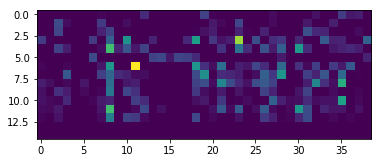

In [138]:
w = logreg.coef_
wsum = np.sum(w**2,axis=0)
plt.imshow(np.abs(w))

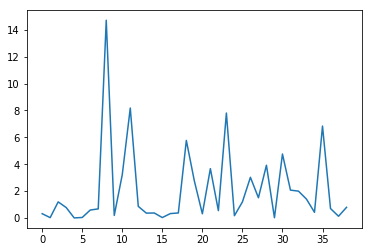

In [139]:
w = logreg.coef_
wsum = np.sum(w**2,axis=0)
plt.plot(wsum)

In [140]:
wsum

array([  3.14647689e-01,   2.14693171e-02,   1.19262768e+00,
         7.71900541e-01,   0.00000000e+00,   3.25811863e-02,
         5.85721777e-01,   6.72417564e-01,   1.47115624e+01,
         1.85711747e-01,   3.21880043e+00,   8.17623424e+00,
         8.59164814e-01,   3.57662499e-01,   3.64881801e-01,
         2.66572535e-02,   3.22835887e-01,   3.68511431e-01,
         5.76696751e+00,   2.75221070e+00,   3.06954473e-01,
         3.66670334e+00,   5.42866154e-01,   7.80473225e+00,
         1.65738785e-01,   1.18870525e+00,   3.02187348e+00,
         1.50070306e+00,   3.92110901e+00,   1.46418125e-02,
         4.75563956e+00,   2.06876240e+00,   1.99246634e+00,
         1.39819219e+00,   4.17628099e-01,   6.83563647e+00,
         6.97259748e-01,   1.24614940e-01,   7.86410648e-01])

In [141]:

keys_1 = []
ind = np.argsort(wsum)
ind = ind[-10:]


In [142]:
keys = ['height', 'weight', 'acceleration', 'aggression', 'agility',
       'balance', 'ballcontrol', 'skillMoves', 'crossing', 'curve',
       'dribbling', 'finishing', 'freekickaccuracy', 'gkdiving',
       'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes',
       'headingaccuracy', 'interceptions', 'jumping', 'longpassing',
       'longshots', 'marking', 'penalties', 'positioning', 'potential',
       'reactions', 'shortpassing', 'shotpower', 'slidingtackle',
       'sprintspeed', 'standingtackle', 'stamina', 'strength', 'vision',
       'volleys', 'weakFoot', 'isGK'] 

In [143]:
for i in ind:
    keys_1.append(keys[i])

In [144]:
keys_1

['potential',
 'dribbling',
 'longpassing',
 'shortpassing',
 'slidingtackle',
 'headingaccuracy',
 'vision',
 'marking',
 'finishing',
 'crossing']

In [145]:
xtrain1 = df[['potential',
 'dribbling',
 'longpassing',
 'shortpassing',
 'slidingtackle',
 'headingaccuracy',
 'vision',
 'marking',
 'finishing',
 'crossing']]

In [146]:
xtrain_new = scale(xtrain1)

In [147]:
x_tr_1 = xtrain_new[:7000]
y_tr_1 = ytrain[:7000]
x_ts_1 = xtrain_new [7000:]
y_ts_1 = ytrain [7000:]

In [148]:
logreg = linear_model.LogisticRegression(C=0.1,penalty='l1')
logreg.fit(x_tr_1,y_tr_1)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [149]:
yhat_1 = logreg.predict(x_ts_1)
np.mean(yhat_1 == y_ts_1)

0.59992001066524459

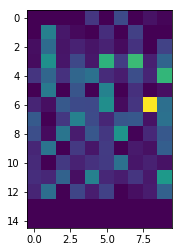

In [150]:
w = logreg.coef_
wsum = np.sum(w**2,axis=0)
plt.imshow(np.abs(w))

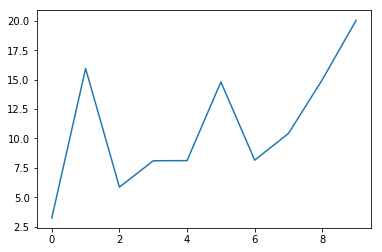

In [151]:
plt.plot(wsum)

In [14]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha = 1e-05, hidden_layer_sizes = (5,2),random_state=1)
clf.fit(x_tr,y_tr)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [15]:
yhat = clf.predict(x_ts)

In [16]:
acc = np.mean(yhat==y_ts)
acc

0.58205572590321286